In [1]:
from numpy import argmax
from pickle import load
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu

In [2]:
# extract descriptions for images
'''
def load_descriptions(doc):
	mapping = dict()
	# process lines
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		if len(line) < 2:
			continue
		# take the first token as the image id, the rest as the description
		image_id, image_desc = tokens[0], tokens[1:]
		# remove filename from image id
		image_id = image_id.split('.')[0]
		# convert description tokens back to string
		image_desc = ' '.join(image_desc)
		# create the list if needed
		if image_id not in mapping:
			mapping[image_id] = list()
		# store description
		mapping[image_id].append(image_desc)
	return mapping

# save descriptions to file, one per line
def save_descriptions(descriptions, filename):
	lines = list()
	for key, desc_list in descriptions.items():
		for desc in desc_list:
			lines.append(key + ' ' + desc)
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()
 
filename = 'Flickr8k_text/Flickr8k.token.txt'
# load descriptions
doc = load_doc(filename)

# parse descriptions
descriptions = load_descriptions(doc)
print('Loaded: %d ' % len(descriptions))

# save descriptions
save_descriptions(descriptions, 'descriptions.txt')
'''

"\ndef load_descriptions(doc):\n\tmapping = dict()\n\t# process lines\n\tfor line in doc.split('\n'):\n\t\t# split line by white space\n\t\ttokens = line.split()\n\t\tif len(line) < 2:\n\t\t\tcontinue\n\t\t# take the first token as the image id, the rest as the description\n\t\timage_id, image_desc = tokens[0], tokens[1:]\n\t\t# remove filename from image id\n\t\timage_id = image_id.split('.')[0]\n\t\t# convert description tokens back to string\n\t\timage_desc = ' '.join(image_desc)\n\t\t# create the list if needed\n\t\tif image_id not in mapping:\n\t\t\tmapping[image_id] = list()\n\t\t# store description\n\t\tmapping[image_id].append(image_desc)\n\treturn mapping\n\n# save descriptions to file, one per line\ndef save_descriptions(descriptions, filename):\n\tlines = list()\n\tfor key, desc_list in descriptions.items():\n\t\tfor desc in desc_list:\n\t\t\tlines.append(key + ' ' + desc)\n\tdata = '\n'.join(lines)\n\tfile = open(filename, 'w')\n\tfile.write(data)\n\tfile.close()\n \nfilena

In [4]:
from os import listdir
from pickle import dump
import io
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
 
# extract features from each photo in the directory
def extract_features(directory):
	# load the model
	model = ResNet50()
	# re-structure the model
	model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
	# summarize
	print(model.summary())
	# extract features from each photo
	features = dict()
	for name in listdir(directory):
		# load an image from file
		filename = directory + '/' + name
		image = load_img(filename, target_size=(224, 224))
		# convert the image pixels to a numpy array
		image = img_to_array(image)
		# reshape data for the model
		image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
		# prepare the image for the VGG model
		image = preprocess_input(image)
		# get features
		feature = model.predict(image, verbose=0)
		# get image id
		image_id = name.split('.')[0]
		# store feature
		features[image_id] = feature
		print('>%s' % name)
	return features
 
# extract features from all images

directory = './Flickr8k_Dataset'
features = extract_features(directory)
print('Extracted Features: %d' % len(features))
# save to file
dump(features, open('features_resnet.pkl', 'wb'))


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

>2387197355_237f6f41ee.jpg
>2609847254_0ec40c1cce.jpg
>2046222127_a6f300e202.jpg
>2853743795_e90ebc669d.jpg
>2696951725_e0ae54f6da.jpg
>3421131122_2e4bde661e.jpg
>3229730008_63f8ca2de2.jpg
>3220009216_10f088185e.jpg
>3415578043_03d33e6efd.jpg
>3437273677_47d4462974.jpg
>3543600125_223747ef4c.jpg
>2594459477_8ca0121a9a.jpg
>2579899436_5086a33c7a.jpg
>3387630781_f421a94d9d.jpg
>3591094476_b61acd63d6.jpg
>3155501473_510f9c9f6b.jpg
>2521062020_f8b983e4b2.jpg
>3564007203_df2b8010f1.jpg
>2869491449_1041485a6b.jpg
>2443229844_277cded27d.jpg
>772212710_f5fc22ed35.jpg
>2269021076_cefc9af989.jpg
>451597318_4f370b1339.jpg
>96978713_775d66a18d.jpg
>2924259848_effb4dcb82.jpg
>1057251835_6ded4ada9c.jpg
>1463732130_a754441289.jpg
>1763020597_d4cc8f0f8a.jpg
>3072611047_109bf8b7c3.jpg
>1002674143_1b742ab4b8.jpg
>3048380686_732db55281.jpg
>1026685415_0431cbf574.jpg
>2480832276_fa55480ecb.jpg
>2300168895_a9b83e16fc.jpg
>3459871361_92d1ecda36.jpg
>3046286572_d2050ab0d9.jpg
>408573233_1fff966798.jpg
>30308

>271660510_dd4ba34b35.jpg
>2285152690_3fb93f65f1.jpg
>2914331767_8574e7703d.jpg
>536495604_b22bbc905a.jpg
>241345721_3f3724a7fc.jpg
>3215108916_0473007b47.jpg
>479807465_cf42f39d00.jpg
>470373679_98dceb19e7.jpg
>2445654384_4ee3e486e1.jpg
>3099091086_f75f0ce09d.jpg
>3263395801_5e4cee2b9e.jpg
>3259231890_16fe167b31.jpg
>2636876892_9353521a1c.jpg
>823675317_b5fbdb17b3.jpg
>523249012_a0a25f487e.jpg
>311267421_e204e643cf.jpg
>416960865_048fd3f294.jpg
>3721881082_afe9fc734e.jpg
>2548777800_d7b9cf1c2b.jpg
>2789937754_5d1fa62e95.jpg
>2088460083_42ee8a595a.jpg
>1224851143_33bcdd299c.jpg
>181157221_e12410ef0b.jpg
>791338571_7f38510bf7.jpg
>3368207495_1e2dbd6d3f.jpg
>485566887_57eac33bd1.jpg
>2788945468_74a9618cfa.jpg
>409327234_7b29eecb4e.jpg
>3298233193_d2a550840d.jpg
>3637013_c675de7705.jpg
>241109594_3cb90fe2a3.jpg
>2588927489_f4da2f11ec.jpg
>3184891327_8785194e3c.jpg
>309238565_2d5d8dc8bf.jpg
>3426789838_8771f0ed56.jpg
>468930779_8008d90e10.jpg
>2774430374_fee1d793e7.jpg
>3433259846_800a6079

>518251319_40e031e818.jpg
>2080033499_6be742f483.jpg
>241347114_6273736da8.jpg
>987907964_5a06a63609.jpg
>2355763034_9fb61a8165.jpg
>219843860_332e5ca7d4.jpg
>3270047169_2ed289a9af.jpg
>2251418114_2b0cd4c139.jpg
>3474999131_788cbf253f.jpg
>3406930103_4db7b4dde0.jpg
>69189650_6687da7280.jpg
>3712742641_641282803e.jpg
>2417745327_a2c2705043.jpg
>2713554148_64cd465e71.jpg
>2244613488_4d1f9edb33.jpg
>3669069522_555c97fbfb.jpg
>2613209320_edf6a2b7e9.jpg
>2902269566_419d9f1d8e.jpg
>765298136_7805fbb079.jpg
>241345942_ea76966542.jpg
>241345522_c3c266a02a.jpg
>3169591322_d0b6d0cd04.jpg
>1308617539_54e1a3dfbe.jpg
>421322723_3470543368.jpg
>483136916_16976f4902.jpg
>3050264832_4215f2b398.jpg
>3231575742_31732664cf.jpg
>3178371973_60c6b8f110.jpg
>368393384_86defdcde8.jpg
>498957941_f0eda42787.jpg
>368212336_bc19b0bb72.jpg
>3173014908_b3e69594b6.jpg
>3450874870_c4dcf58fb3.jpg
>3189964753_a95536ced9.jpg
>3246773992_89bf86937b.jpg
>47871819_db55ac4699.jpg
>3080891382_edf83dde18.jpg
>3225880532_c8d5d

>241347700_ef2451d256.jpg
>2797511323_bf20acab45.jpg
>3018847610_0bf4d7e43d.jpg
>3202360797_2084743e90.jpg
>985067019_705fe4a4cc.jpg
>2291485126_b8d41a63f4.jpg
>2308271254_27fb466eb4.jpg
>2140747429_62cfd89ae9.jpg
>3465000218_c94e54e208.jpg
>3322200641_c2e51ff37b.jpg
>3563668905_689ed479c5.jpg
>3424927725_c4d1fcfac3.jpg
>134894450_dadea45d65.jpg
>3568605391_54ec367d88.jpg
>3027009366_c8362521e8.jpg
>2220612655_030413b787.jpg
>300577374_bfccb0430b.jpg
>186346360_541047336f.jpg
>261490838_2f3ac98b12.jpg
>3540155303_08225a4567.jpg
>2921198890_6f70dfbf4c.jpg
>2992614450_b5a6692239.jpg
>2369452202_8b0e8e25ca.jpg
>2173677067_9d0732bcc2.jpg
>3181322965_ce9da15271.jpg
>3207343907_995f7ac1d2.jpg
>3381161854_af8b05243c.jpg
>2815256108_fc1302117d.jpg
>2940594396_20c40947b0.jpg
>519167484_ee03e2a91e.jpg
>281419391_522557ce27.jpg
>2250555512_71670078f5.jpg
>396179143_e1511336e1.jpg
>2437266971_b91a8f9a00.jpg
>2618322793_5fb164d86a.jpg
>3644142276_caed26029e.jpg
>2730938963_c4ed3e2258.jpg
>756521713

>96420612_feb18fc6c6.jpg
>3484906808_ee20714408.jpg
>274313927_404d0e94ab.jpg
>2394922193_310166d6af.jpg
>2886411666_72d8b12ce4.jpg
>2980118787_2099de53ec.jpg
>2923475135_a6b6e13d26.jpg
>3274375509_4fe91a94c0.jpg
>2052702658_da1204f6d1.jpg
>2928152792_b16c73434a.jpg
>1107471216_4336c9b328.jpg
>3468275336_61936db92d.jpg
>108899015_bf36131a57.jpg
>2053006423_6adf69ca67.jpg
>2559921948_06af25d566.jpg
>3526150930_580908dab6.jpg
>3512033659_7e8a0c2ffa.jpg
>1679565118_d36f0d6d52.jpg
>2886837407_a4510ab1ef.jpg
>530454257_66d58b49ee.jpg
>2128119486_4407061c40.jpg
>3441511444_b031585b45.jpg
>2873070704_2141a7a86a.jpg
>3538527033_df13112d51.jpg
>2426781076_e3f4d2685c.jpg
>3640109324_3ce89e4d1a.jpg
>2862004252_53894bb28b.jpg
>3019857541_3de3e24f54.jpg
>530888330_a18343e38d.jpg
>544257613_d9a1fea3f7.jpg
>3577309234_c952c2af86.jpg
>241346146_f27759296d.jpg
>3484576025_a8c50942aa.jpg
>1956944011_c5661d3f22.jpg
>2553550034_5901aa9d6c.jpg
>218342358_1755a9cce1.jpg
>2990563425_2f7246f458.jpg
>380590140

>3367034082_31658a89bb.jpg
>3162095736_cc41dd41ff.jpg
>3636491114_ab34dac833.jpg
>3537520829_aab733e16c.jpg
>496110746_a93ca191ae.jpg
>142802798_962a4ec5ce.jpg
>3105691757_817083b0a6.jpg
>1115565519_d976d4b1f1.jpg
>2192333873_2a0cbe849d.jpg
>3562001359_65c63aeda3.jpg
>2559638792_a803ff63d1.jpg
>3017203816_5dc2a6b392.jpg
>2619267133_53a5904ef4.jpg
>2978394277_4572967b97.jpg
>10815824_2997e03d76.jpg
>263216826_acf868049c.jpg
>2403544744_cba152f5c1.jpg
>3729405438_6e79077ab2.jpg
>2677656448_6b7e7702af.jpg
>2854291706_d4c31dbf56.jpg
>340667199_ecae5f6029.jpg
>373394550_1b2296b8c4.jpg
>640506101_ae1145b6d1.jpg
>3360730513_211e1a4db6.jpg
>2524003134_580e74328b.jpg
>3375070563_3c290a7991.jpg
>537479916_c033897fac.jpg
>2630507245_bea4804288.jpg
>3051125715_db76cebd1e.jpg
>412203580_2c7278909c.jpg
>3163281186_e2f43dfb5f.jpg
>299181827_8dc714101b.jpg
>3715559023_70c41b31c7.jpg
>368954110_821ccf005c.jpg
>3596459539_a47aa80612.jpg
>1316247213_1d2c726dd5.jpg
>3301754574_465af5bf6d.jpg
>2939475047_8

>2978810122_183e60ff2d.jpg
>2978236380_fb24c43f1e.jpg
>3346040664_5b584e6133.jpg
>382701159_f98c1988cd.jpg
>1087168168_70280d024a.jpg
>2711720095_0b98426d3c.jpg
>3283913180_7d4e43602d.jpg
>3348385580_10b53391f9.jpg
>1016887272_03199f49c4.jpg
>3342487512_fd33971dea.jpg
>1163282319_b729b24c46.jpg
>3176131893_7181c733aa.jpg
>3199895624_4f01798c6f.jpg
>3251460982_4578a568bb.jpg
>2567035103_3511020c8f.jpg
>3500136982_bf7a85531e.jpg
>244399048_8332bb3270.jpg
>3453284877_8866189055.jpg
>236095034_c983bdfbbf.jpg
>3564543247_05cdbc31cf.jpg
>3671933270_d124e9a1a4.jpg
>3258394043_a0b6a94dce.jpg
>3265578645_4044a7049a.jpg
>3215896272_e9b4b547a9.jpg
>693785581_68bec8312a.jpg
>3529721084_4b405baf54.jpg
>497122685_a51b29dc46.jpg
>2419186511_f0ce5f9685.jpg
>2466171114_3fa51415a7.jpg
>2526585002_10987a63f3.jpg
>2773400732_5b65a25857.jpg
>2164363131_6930455d45.jpg
>2324979199_4193ef7537.jpg
>2831215155_07ba8f1805.jpg
>2543017787_9720b4fa1c.jpg
>3122579598_14841c038a.jpg
>2765747519_2b851e01d6.jpg
>19316

>2709275718_73fcf08c23.jpg
>1786425974_c7c5ad6aa1.jpg
>3082934678_58534e9d2c.jpg
>339658315_fbb178c252.jpg
>299572828_4b38b80d16.jpg
>2213113526_beeb4f9bdc.jpg
>2854959952_3991a385ab.jpg
>3259666643_ae49524c81.jpg
>528498076_43f0ef36b5.jpg
>1341787777_4f1ebb1793.jpg
>3546891929_f31a99cd0d.jpg
>3335370208_460fc19bfa.jpg
>485245061_5a5de43e20.jpg
>3426724811_137855b4f7.jpg
>2161799386_27aa938421.jpg
>2822290399_97c809d43b.jpg
>3409506817_775e38d219.jpg
>405961988_fcfe97f31e.jpg
>2176874361_2b4149010b.jpg
>72964268_d532bb8ec7.jpg
>3156991513_3bf03333d8.jpg
>3156113206_53c2a7b5d8.jpg
>300222673_573fd4044b.jpg
>2657484970_610e18144f.jpg
>565605894_8f0bed0438.jpg
>2642474867_4e6346f809.jpg
>3509611207_7645b1d28d.jpg
>2087317114_cf06df5aa5.jpg
>3630102841_b4c3e00b2c.jpg
>3537400880_8f410d747d.jpg
>3697003897_d8ac13be9a.jpg
>872512911_ca383b40e4.jpg
>177302997_5b2d770a0a.jpg
>106514190_bae200f463.jpg
>3549614763_42f34f3d1e.jpg
>256439287_990ac4a761.jpg
>509123893_07b8ea82a9.jpg
>2393196444_8f4

>3613705104_46d854134e.jpg
>2917843040_7c9caaaa8a.jpg
>694496803_f2a05869cf.jpg
>3541474181_489f19fae7.jpg
>3293018193_e4e0c8db7c.jpg
>2863349041_5eba6e3e21.jpg
>3269380710_9161b0bd00.jpg
>1803631090_05e07cc159.jpg
>3484841598_e26ee96aab.jpg
>3687995245_624b54090d.jpg
>145721496_687af9bb18.jpg
>2429978680_1e18a13835.jpg
>3613175012_bcd063e7c9.jpg
>476760133_c33d2bd83d.jpg
>3033668641_5905f73990.jpg
>3060594966_030658d318.jpg
>3189293145_35dea42679.jpg
>400562847_e15aba0aac.jpg
>3470008804_0ca36a7a09.jpg
>3364861247_d590fa170d.jpg
>3502993968_4ee36afb0e.jpg
>2923825744_ca125353f0.jpg
>2105756457_a100d8434e.jpg
>2420730259_86e7f8a815.jpg
>2409597310_958f5d8aff.jpg
>3582914905_f58db879ae.jpg
>3389321512_b11f499dab.jpg
>2295447147_458cfea65a.jpg
>2568417021_afa68423e5.jpg
>2186139563_e60c1d4b8b.jpg
>871290666_4877e128c0.jpg
>2073964624_52da3a0fc4.jpg
>1415591512_a84644750c.jpg
>2883324329_24361e2d49.jpg
>396763804_3b7f1e12a8.jpg
>443430496_3fea95a07d.jpg
>3718007650_e5930b4509.jpg
>2515247

>549887636_0ea5ae4739.jpg
>990890291_afc72be141.jpg
>3262301835_9f1a49b80a.jpg
>745880539_cd3f948837.jpg
>3282897060_8c584e2ce8.jpg
>2479180530_7ebba2d8bf.jpg
>3382303178_69b6d1bdd2.jpg
>3550763985_800cfee7e4.jpg
>2464259416_238ef13a2e.jpg
>2480850054_de3433b54a.jpg
>3099504809_565e17e49d.jpg
>3490597800_8f94f7d353.jpg
>3591462960_86045906bd.jpg
>2496236371_61dec88113.jpg
>3555729342_cc7a3b67fd.jpg
>3545652636_0746537307.jpg
>493507605_48fe8e3739.jpg
>3535372414_4c51c86fc4.jpg
>2380740486_8cd5d4601a.jpg
>2529116152_4331dabf50.jpg
>3626964430_cb5c7e5acc.jpg
>2554081584_233bdf289a.jpg
>3586239953_da4fb3f775.jpg
>3131107810_7e9b96cddc.jpg
>3217620013_8b17873273.jpg
>3214151585_f2d0b00b41.jpg
>3535284878_f90f10236e.jpg
>3425851292_de92a072ee.jpg
>3160531982_37f5636b8a.jpg
>524036004_6747cf909b.jpg
>3204712107_5a06a81002.jpg
>3404552106_f516df0f5b.jpg
>1536597926_c2e1bc2379.jpg
>3484832904_08619300d9.jpg
>2053733930_e245615ad4.jpg
>449352117_63c359c6e7.jpg
>2877159456_ea4a46b0d2.jpg
>525538

>3240558825_cd859d6230.jpg
>2255266906_8222af18b9.jpg
>3355756569_b430a29c2a.jpg
>2470486377_c3a39ccb7b.jpg
>2647049174_0fb47cee2e.jpg
>2062607137_dac194ad02.jpg
>418796494_bdb441de42.jpg
>1552065993_b4dcd2eadf.jpg
>480200554_6155e9dfeb.jpg
>3430526230_234b3550f6.jpg
>3690425778_3b390b3ea5.jpg
>3211577298_14296db6fd.jpg
>3621717946_d96f8a6012.jpg
>816084977_21c1811c9a.jpg
>382151094_c7376cf22b.jpg
>365759754_6cf7068c9a.jpg
>3525841965_7814484515.jpg
>3319020762_d429d56a69.jpg
>2915183095_4ed4aa4f37.jpg
>3648160673_0c783236a6.jpg
>2250870111_8402d2319d.jpg
>2428959030_bdffc2812e.jpg
>3223224391_be50bf4f43.jpg
>2328106090_b7c2725501.jpg
>3329777647_5e1fd503ac.jpg
>3067971348_69af5bb309.jpg
>3244747165_17028936e0.jpg
>2098418613_85a0c9afea.jpg
>3569979711_6507841268.jpg
>3171651115_e07b9d08f6.jpg
>3116985493_04b1dc3345.jpg
>3293751640_d81a6f3a0c.jpg
>2844641033_dab3715a99.jpg
>3495453699_1c9faedf3c.jpg
>3386060324_b98fdfa449.jpg
>1430154945_71bbaa094a.jpg
>3431860810_44277cd360.jpg
>27294

>1460352062_d64fb633e0.jpg
>3515358125_9e1d796244.jpg
>3396153660_f729d9f9b9.jpg
>3399798295_a452963365.jpg
>2511762757_bd0ab0a017.jpg
>3304484212_b950233c30.jpg
>3691729694_2b97f14c1e.jpg
>2730994020_64ac1d18be.jpg
>2774362575_7543b8bf19.jpg
>505955292_026f1489f2.jpg
>3298175192_bbef524ddc.jpg
>3502897880_8392d0e4de.jpg
>2275372714_017c269742.jpg
>3613955682_3860e116cf.jpg
>3612484827_0e479f9ee8.jpg
>3609027309_af75f773d9.jpg
>2985679744_75a7102aab.jpg
>248994078_a9257f448b.jpg
>3339319023_5dcc3ef81a.jpg
>1685463722_55843b6d3c.jpg
>3504158556_1d410c8ff7.jpg
>3270691950_88583c3524.jpg
>3636126441_5617c89aaa.jpg
>3346711367_5e7b29e20f.jpg
>234241682_51d9fabb27.jpg
>2201951969_0d7520d648.jpg
>3374223949_90776ba934.jpg
>264141937_585320617a.jpg
>244910177_7c4ec3f65b.jpg
>459284240_5a4167bf92.jpg
>2340919359_f56787d307.jpg
>3172369593_eb4d787ffb.jpg
>1461667284_041c8a2475.jpg
>2181724497_dbb7fcb0a9.jpg
>2443380641_7b38d18f5b.jpg
>3241726740_6d256d61ec.jpg
>2404692474_37da774368.jpg
>333926

>3393394134_0caac47e1c.jpg
>2591110592_ef5f54f91c.jpg
>1476241331_2f43b67aed.jpg
>3563924606_5914392cd8.jpg
>2778290592_1910bb0431.jpg
>2147199188_d2d70b88ec.jpg
>3667404919_b273df57e4.jpg
>2611651553_61f859837e.jpg
>3229519418_040f05ced1.jpg
>3133403457_95dfe11da1.jpg
>3537474810_cf676b3259.jpg
>1259936608_e3f0064f23.jpg
>508929192_670910fdd2.jpg
>3226254560_2f8ac147ea.jpg
>948196883_e190a483b1.jpg
>3106026005_473a7b1c8c.jpg
>525968880_82623392d1.jpg
>486712504_36be449055.jpg
>3670907052_c827593564.jpg
>3232252882_05db7c2216.jpg
>3025546819_ce031d2fc3.jpg
>2805822564_6dee48e506.jpg
>783994497_4f6885454d.jpg
>502671104_b2114246c7.jpg
>3458215674_2aa5e64643.jpg
>3708172446_4034ddc5f6.jpg
>3077166963_fe172c709d.jpg
>3148571800_c5515e6c3d.jpg
>3668518431_43abb169eb.jpg
>1235685934_be89b231fb.jpg
>2514581496_8f4102377e.jpg
>3425685827_03683e8e5a.jpg
>3660361818_e05367693f.jpg
>2939197393_93dc64c4bb.jpg
>2204777844_1bcf26bf84.jpg
>2469351714_d72becd21e.jpg
>3131990048_369b081021.jpg
>329394

>3211581957_df2f7e2236.jpg
>1827560917_c8d3c5627f.jpg
>3725202807_12fbfdd207.jpg
>3069786374_804e1123ac.jpg
>3522989916_f20319cc59.jpg
>1962729184_6996e128e7.jpg
>3302804312_0272091cd5.jpg
>3600909823_ce72c26e66.jpg
>197142902_f05ff198c2.jpg
>280706862_14c30d734a.jpg
>3260191163_6c1551eee8.jpg
>3396157719_6807d52a81.jpg
>1814391289_83a1eb71d3.jpg
>3470129475_9e58b6742c.jpg
>1423126855_6cd2a3956c.jpg
>1131340021_83f46b150a.jpg
>3590647207_2d4ec3f52c.jpg
>3738685861_8dfff28760.jpg
>3038760935_9a713510eb.jpg
>3571147934_d1c8af1d6e.jpg
>247097023_e656d5854d.jpg
>1572532018_64c030c974.jpg
>3626642428_3396568c3c.jpg
>3255620561_7644747791.jpg
>2169067981_cc19268f23.jpg
>862054277_34b5a6f401.jpg
>1977827746_4e13d7e19f.jpg
>3030079705_0dee8a3e89.jpg
>1352410176_af6b139734.jpg
>437054333_5c2761b8cd.jpg
>2945036454_280fa5b29f.jpg
>3474985112_24ef46e82d.jpg
>1425069308_488e5fcf9d.jpg
>3614582606_16bd88dab2.jpg
>2171154778_8189169336.jpg
>3661239105_973f8216c4.jpg
>299178969_5ca1de8e40.jpg
>321508

>405970010_8cebaa77d3.jpg
>3674521435_89ff681074.jpg
>3623302162_099f983d58.jpg
>348380010_33bb0599ef.jpg
>2938120171_970564e3d8.jpg
>2390778197_4d9d03d4b9.jpg
>2431120202_b24fe2333a.jpg
>3217240672_b99a682026.jpg
>917574521_74fab68514.jpg
>533483374_86c5d4c13e.jpg
>582788646_dc40748639.jpg
>1713248047_d03721456d.jpg
>3154886184_ac842655b6.jpg
>3197891333_b1b0fd1702.jpg
>244368383_e90b6b2f20.jpg
>2904601886_39e9d317b1.jpg
>2752084369_52e7867da7.jpg
>2741051940_89fb6b2cee.jpg
>2325258180_6217dd17eb.jpg
>2936590102_25036069a6.jpg
>3389448506_7025e7cc12.jpg
>3767841911_6678052eb6.jpg
>3181328245_7c04ce1691.jpg
>3603116579_4a28a932e2.jpg
>397815951_3b02090324.jpg
>3239866450_3f8cfb0c83.jpg
>95151149_5ca6747df6.jpg
>2394824046_51cec8e5e7.jpg
>609681901_66809d2dc1.jpg
>185057637_e8ada37343.jpg
>3590739067_58baffb3a7.jpg
>2259336826_0cb294e1f7.jpg
>1460500597_866fa0c6f3.jpg
>2159447283_fab8c272b0.jpg
>2586028627_ddd054d8cc.jpg
>3425414048_fa14d33067.jpg
>2675190069_d5c3b2c876.jpg
>2411824767_

>2589308405_e208b5e745.jpg
>191003283_992257f835.jpg
>3359089834_263e529c71.jpg
>3543378438_47e2712486.jpg
>239453674_0df7767208.jpg
>3765374230_cb1bbee0cb.jpg
>2565685680_c30972455d.jpg
>219301555_17883a51bd.jpg
>2448393373_80c011d301.jpg
>448658518_eec0b648a6.jpg
>3583321426_f373c52161.jpg
>3589052481_059e5e2c37.jpg
>2186087673_c7a73da7ce.jpg
>3477672764_7f07657a26.jpg
>241346317_be3f07bd2e.jpg
>3496028495_431cfdc042.jpg
>440184957_267f3f3a2b.jpg
>2911238432_33ec2d8cec.jpg
>2861413434_f0e2a10179.jpg
>3141613533_595723208d.jpg
>2613920405_e91e6ebd7a.jpg
>264928854_d9e61f3a8e.jpg
>2315418282_80bd0bb1c0.jpg
>2214132302_80064fd79d.jpg
>2054869561_ff723e9eab.jpg
>3702436188_2c26192fd0.jpg
>3647446816_bd4383c828.jpg
>3272541970_ac0f1de274.jpg
>316833109_6500b526dc.jpg
>2333584535_1eaf9baf3e.jpg
>3125628091_25a31709df.jpg
>3410902181_b2a3c6eec9.jpg
>3324056835_84904fe2f8.jpg
>3109780402_dbae082dc5.jpg
>3399284917_721aefe2a7.jpg
>3323076458_3ce72a1dae.jpg
>506367606_7cca2bba9b.jpg
>256283122

>2766630484_ce73f47031.jpg
>837893113_81854e94e3.jpg
>3427023324_f1f6504bf4.jpg
>460350019_af60511a3b.jpg
>551664516_78a5131dc4.jpg
>2795352290_9209b214f3.jpg
>3419634480_c390f62a6e.jpg
>3091594712_2166604334.jpg
>1425069590_570cc7c2d8.jpg
>2918880895_e61f74f2f0.jpg
>3091921457_83eee69591.jpg
>2707969386_94dde00ce4.jpg
>3132760860_3e743a935d.jpg
>2242178517_2325b85e5f.jpg
>2824004868_1fc0a81173.jpg
>2201192417_d934730fea.jpg
>3569406219_f37ebf7b92.jpg
>2056041678_d6b5b39b26.jpg
>1383698008_8ac53ed7ec.jpg
>380527679_574749123d.jpg
>3756150099_50882fc029.jpg
>2602679255_785b851b46.jpg
>3667157255_4e66d11dc2.jpg
>673806038_0a3682a83f.jpg
>2255342813_5b2ac6d633.jpg
>3627290893_561e176e80.jpg
>2613993276_3c365cca12.jpg
>3490528249_6aae9b867b.jpg
>285306009_f6ddabe687.jpg
>127490019_7c5c08cb11.jpg
>1401961581_76921a75c5.jpg
>762947607_2001ee4c72.jpg
>3391924827_53b31542ce.jpg
>1348957576_c4a78eb974.jpg
>2426215757_e008a91fcb.jpg
>3044500219_778f9f2b71.jpg
>3455419642_894d03f153.jpg
>34204694

>2561295656_4f21fba209.jpg
>2980348138_91cc6f6d0f.jpg
>3427233064_6af01bfc5c.jpg
>2551632823_0cb7dd779b.jpg
>3225478803_f7a9a41a1d.jpg
>3523559027_a65619a34b.jpg
>2943384009_c8cf749181.jpg
>3457604528_302396c08c.jpg
>3107592525_0bcd00777e.jpg
>3080056515_3013830309.jpg
>2851198725_37b6027625.jpg
>1773928579_5664a810dc.jpg
>438639005_208bc59b0b.jpg
>693450725_8ad72389e6.jpg
>2615623392_ab2b9759ae.jpg
>2310233145_910cb5b4c8.jpg
>3240094420_a9eea11d39.jpg
>537579448_a7f92cef58.jpg
>3565654691_22b97d3994.jpg
>3439982121_0afc6d5973.jpg
>3228960484_9aab98b91a.jpg
>2505988632_9541f15583.jpg
>2977379863_2e8d7a104e.jpg
>2597873827_a5cb3e57ba.jpg
>3053415073_5b667230ed.jpg
>1490213660_9ea45550cf.jpg
>279230262_e541f9b670.jpg
>2757779501_c41c86a595.jpg
>3654338683_13b2f95a9a.jpg
>2180480870_dcaf5ac0df.jpg
>345785626_9fa59f38ce.jpg
>3042679440_010b2c596c.jpg
>3284887033_e2e48f1863.jpg
>3558438174_d8f41438a4.jpg
>314904143_5a216a192b.jpg
>3621329299_6fb3f2935c.jpg
>2481367956_8577d2fa98.jpg
>769260

>2647394564_4843800cff.jpg
>3430287726_94a1825bbf.jpg
>3294202771_e8ee78a439.jpg
>2192026581_b782d1355a.jpg
>261883591_3f2bca823c.jpg
>3432550415_e7b77232de.jpg
>1358892595_7a37c45788.jpg
>2685752892_9d5cd7f274.jpg
>3280672302_2967177653.jpg
>2921112724_5cb85d7413.jpg
>2987576188_f82304f394.jpg
>3543294190_0037c59607.jpg
>3351586010_7ffaa90ea8.jpg
>2954525375_9d5ca97341.jpg
>3317333893_9d0faa8d30.jpg
>2472678549_67068a1566.jpg
>3128856481_86e5df4160.jpg
>3360876049_9047edeab9.jpg
>3692836015_d11180727b.jpg
>2256133102_e2c8314ecb.jpg
>1400424834_1c76e700c4.jpg
>2750832671_4b39f06acf.jpg
>325005410_e1ff5041b5.jpg
>1515883224_14e36a53c7.jpg
>3638459638_ec74e3ff89.jpg
>3560977956_e08d2cd531.jpg
>2699125097_c6801d80ed.jpg
>3688858505_e8afd1475d.jpg
>2704362232_7d84503433.jpg
>2432061076_0955d52854.jpg
>358114269_96fdb5f7c3.jpg
>3609645320_815c294b65.jpg
>3527524436_a54aca78a9.jpg
>3359530430_249f51972c.jpg
>3657209354_cde9bbd2c5.jpg
>3277824093_299cbb3138.jpg
>260231029_966e2f1727.jpg
>3741

>878758390_dd2cdc42f6.jpg
>3134387321_3a253224c1.jpg
>957682378_46c3b07bcd.jpg
>3201427741_3033f5b625.jpg
>3667492609_97f88b373f.jpg
>3306464579_1b16a0caf2.jpg
>3031263767_2e3856130e.jpg
>2453318633_550228acd4.jpg
>1160034462_16b38174fe.jpg
>2339106348_2df90aa6a9.jpg
>2271264741_aa8f73f87c.jpg
>3477977145_4df89d69a1.jpg
>3458379941_657182bb09.jpg
>3728256505_7f8db8270d.jpg
>522486784_978021d537.jpg
>3544483327_830349e7bc.jpg
>3638908276_b1751d30ff.jpg
>2780031669_a0345cfc26.jpg
>2640000969_b5404a5143.jpg
>3495349745_1b29a63571.jpg
>528500099_7be78a0ca5.jpg
>2748435417_ea7bbcc17c.jpg
>3643684688_2f7157b23d.jpg
>837919879_94e3dacd83.jpg
>2271955077_0020b4ee0d.jpg
>2369840118_a1c4240ab7.jpg
>2708634088_a4686be24c.jpg
>3463523977_f2ed231585.jpg
>1433577867_39a1510c43.jpg
>3676561090_9828a9f6d0.jpg
>3700554247_9824ae6f3a.jpg
>363617160_6cb0c723be.jpg
>2787868417_810985234d.jpg
>468871328_72990babd4.jpg
>2970461648_fe14ba0359.jpg
>2921094201_2ed70a7963.jpg
>2238166082_140f8b01b8.jpg
>1007320

>3139393607_f0a54ca46d.jpg
>2045562030_654ddea5e5.jpg
>3406409018_03de95181e.jpg
>3697359692_8a5cdbe4fe.jpg
>2312747482_20a81b2230.jpg
>3125041578_c1f2d73b6d.jpg
>2560278143_aa5110aa37.jpg
>294709836_87126898fb.jpg
>1167662968_e466f1e80a.jpg
>3686078365_9e655e238f.jpg
>390360326_26f5936189.jpg
>2678612999_893ed671f8.jpg
>2589156742_c46bc82137.jpg
>3279988814_d3693dcb6c.jpg
>2709648336_15455e60b2.jpg
>811663364_4b350a62ce.jpg
>1808504612_3508f3c9bb.jpg
>2661567396_cbe4c2e5be.jpg
>2818735880_68b3dfe1f5.jpg
>3677329561_fa3e1fdcf9.jpg
>3597146852_3d000a5d5f.jpg
>2447972568_1e9b287691.jpg
>929679367_ff8c7df2ee.jpg
>3185409663_95f6b958d8.jpg
>451081733_40218cec31.jpg
>2695962887_a1647c567b.jpg
>3415809168_af9dabdba5.jpg
>3353962769_ba48691bc6.jpg
>3397228832_8ce5b1c26f.jpg
>2750867389_4b815f793a.jpg
>1402640441_81978e32a9.jpg
>1917265421_aeccf1ca38.jpg
>2949353587_64c54e9589.jpg
>3014015906_fdba461f36.jpg
>2435685480_a79d42e564.jpg
>2657484284_daa07a3a1b.jpg
>1540631615_8b42c1b160.jpg
>24714

>3516285214_59823b341e.jpg
>3091916691_b1c96669c6.jpg
>3170110692_d1e0e66cee.jpg
>3176498130_52ab9460b2.jpg
>953941506_5082c9160c.jpg
>397547349_1fd14b95af.jpg
>241345770_9f8aa6723c.jpg
>3073579130_7c95d16a7f.jpg
>3221036999_3f7b152d8a.jpg
>3329289652_e09b80e2f3.jpg
>3658427967_6e2e57458d.jpg
>3523972229_d44e9ff6d7.jpg
>353180303_6a24179c50.jpg
>299612419_b55fe32fea.jpg
>3562282690_cd2a95fe9e.jpg
>2653552905_4301449235.jpg
>2428751994_88a6808246.jpg
>2458269558_277012780d.jpg
>3288173388_03bc2a844d.jpg
>661757041_61e131e913.jpg
>2720215226_5a98ff2bd3.jpg
>1480712062_32a61ad4b7.jpg
>3636632926_09f39f2629.jpg
>349889354_4b2889a9bd.jpg
>3359636318_39267812a0.jpg
>1439282131_3814d6ae04.jpg
>2683985894_167d267dcb.jpg
>3640661245_c8c419524d.jpg
>3715469645_6d1dc019b3.jpg
>387974450_bcd205daac.jpg
>1252396628_eb81d3905b.jpg
>3532200762_b28c39d311.jpg
>3286017638_c688c83e3d.jpg
>2798880731_4f51634374.jpg
>1417941060_2a0f7908bc.jpg
>720208977_f44c2bba5b.jpg
>3100442775_6e2659b973.jpg
>352086988

>56489627_e1de43de34.jpg
>3273403495_fcd09c453e.jpg
>3671777903_6fbf643980.jpg
>1413956047_c826f90c8b.jpg
>2320125735_27fe729948.jpg
>3545793128_af3af544dc.jpg
>518789868_8895ef8792.jpg
>2165461920_1a4144eb2b.jpg
>3672105509_53b13b2ed4.jpg
>3289433994_4c67aab384.jpg
>3070130228_67dcfee9ae.jpg
>3687996279_05b5a2a706.jpg
>351876121_c7c0221928.jpg
>2696866120_254a0345bc.jpg
>2624044128_641b38c0cf.jpg
>397601572_9587a39291.jpg
>136639119_6040b00946.jpg
>3479245321_6a5bc470f8.jpg
>2771424045_1fdf9617eb.jpg
>3599568766_9e96def0ef.jpg
>3172384527_b107385a20.jpg
>384577800_fc325af410.jpg
>3288274849_07ff76ee93.jpg
>3564385317_1bf5094068.jpg
>1517721825_10176d0683.jpg
>3217893350_57be430d06.jpg
>772403830_08b72c7da9.jpg
>2931254547_e97c6d0d63.jpg
>3375134059_7e9eb2ef01.jpg
>3108378861_d2214d971e.jpg
>3651476768_2bae721a6b.jpg
>3150315970_8f045c41a4.jpg
>2609900643_c07bcb0bae.jpg
>3256603992_67312b5a36.jpg
>3214885227_2be09e7cfb.jpg
>121800200_bef08fae5f.jpg
>3189941492_a3f4347b1a.jpg
>241346434

>278105206_df987b0ca0.jpg
>3431121650_056db85987.jpg
>1994416869_4dd769a806.jpg
>3119903318_d032141839.jpg
>3508051251_82422717b3.jpg
>2445442929_8c81d42460.jpg
>3721799573_2f470950e0.jpg
>3504881781_6a842e043b.jpg
>58363928_6f7074608c.jpg
>543363241_74d8246fab.jpg
>407008823_bdd7fc6ed5.jpg
>3139389284_f01bd4c236.jpg
>2831313661_1a328acb70.jpg
>3452411712_5b42d2a1b5.jpg
>2504056718_25ded44ecb.jpg
>2110692070_8aaaa1ae39.jpg
>3335692531_dd4a995f91.jpg
>1244485675_822e6efe60.jpg
>3196100539_102fe877b3.jpg
>3325910784_5ecb88310c.jpg
>3402638444_dab914a3de.jpg
>2256138896_3e24b0b28d.jpg
>2450299735_62c095f40e.jpg
>2149982207_5345633bbf.jpg
>427557693_1108566fd2.jpg
>3335773346_ac0d97efeb.jpg
>2593695271_4d9cc9bd6f.jpg
>279728508_6bd7281f3c.jpg
>3425756814_13909354d4.jpg
>534886684_a6c9f40fa1.jpg
>2362481035_a7600875d0.jpg
>3371266735_43150bce52.jpg
>523991446_65dbc5a4a5.jpg
>2192802444_b14bb87b95.jpg
>3257182199_5fda78d870.jpg
>3319489465_c65c91e4f2.jpg
>3493255026_5fdaa52cbe.jpg
>338338886

>1874617189_e85d3f4326.jpg
>300274198_eefd8e057e.jpg
>401079494_562454c4d6.jpg
>3608752424_01a1cfd8a6.jpg
>1525153022_06c48dbe52.jpg
>778885185_3f6905370b.jpg
>3403370354_5d266873b4.jpg
>3274879561_74997bbfff.jpg
>3602676311_824b2c04ba.jpg
>288880576_818b6ecfef.jpg
>3057770908_3fd97f79f9.jpg
>1812525037_528465037c.jpg
>2887744223_029f2fd5fe.jpg
>491564019_1ca68d16c1.jpg
>57422853_b5f6366081.jpg
>2092870249_90e3f1855b.jpg
>2655183854_5852790214.jpg
>3376014640_ff5b00769f.jpg
>2867845624_22e4fe0a23.jpg
>1248940539_46d33ed487.jpg
>3396275223_ee080df8b5.jpg
>3016741474_72b4355198.jpg
>3721082512_8277087f3f.jpg
>3330333217_1a69497a74.jpg
>411863595_d77156687e.jpg
>3475552729_a3abd81ee6.jpg
>2102732029_9ae520914d.jpg
>760138567_762d9022d4.jpg
>3587449716_3bf1552c36.jpg
>1295671216_cde1b9c9d1.jpg
>229954612_a4438297ee.jpg
>2502079538_10ef2e976b.jpg
>2286239223_d84ffc4e4a.jpg
>3243233886_235a80e8c7.jpg
>3101796900_59c15e0edc.jpg
>305749904_54a612fd1a.jpg
>2661437618_ca7a15f3cb.jpg
>2902486045_

>3030793171_55cd646eed.jpg
>2706766641_a9df81969d.jpg
>448252603_7d928c900e.jpg
>109823394_83fcb735e1.jpg
>2294598473_40637b5c04.jpg
>2265100168_175f8218af.jpg
>1454841725_4b6e6199e2.jpg
>3003612178_8230d65833.jpg
>481887827_f8975dabf1.jpg
>416106657_cab2a107a5.jpg
>3386953179_84c2d7922f.jpg
>2744705147_acd767d3eb.jpg
>2301379282_5fbcf230d1.jpg
>3203453897_6317aac6ff.jpg
>2790909995_8b7a03d9d1.jpg
>2826647354_650ff5eb03.jpg
>3401548798_3a93f2caa5.jpg
>477204750_d04d111cd4.jpg
>3371887001_44ab0c2f17.jpg
>1141718391_24164bf1b1.jpg
>1263801010_5c74bf1715.jpg
>2089442007_6fc798548c.jpg
>1141739219_2c47195e4c.jpg
>270263570_3160f360d3.jpg
>2090327868_9f99e2740d.jpg
>2552723989_7bc93e0f7b.jpg
>3566225740_375fc15dde.jpg
>244910130_e1f823a28a.jpg
>2208055895_37cd8e1edf.jpg
>3582914739_bef2828a06.jpg
>3338291921_fe7ae0c8f8.jpg
>1355450069_c0675b0706.jpg
>1675679141_36c9bc2969.jpg
>219730733_6a55382dd2.jpg
>2465441099_a1761a1757.jpg
>320093980_5388cb3733.jpg
>2842032768_9d9ce04385.jpg
>255001190

>3136688093_568b053bdf.jpg
>3495490064_8db40a83af.jpg
>2855667597_bf6ceaef8e.jpg
>2866974237_e3c1e267c0.jpg
>3523874798_9ba2fa46e3.jpg
>3366105287_49a4bf71c6.jpg
>3632842482_482f29e712.jpg
>3720210639_18bb34e475.jpg
>2257798999_d9d1b9a45a.jpg
>3215315009_47577bf8f7.jpg
>2313822078_282dc07531.jpg
>997722733_0cb5439472.jpg
>3718076407_0b4588d7bc.jpg
>2887750774_920eb171aa.jpg
>2116444946_1f5d1fe5d1.jpg
>3563871276_c8b2a00df5.jpg
>2102315758_a9148a842f.jpg
>2206600240_f65df56a09.jpg
>244443352_d7636e1253.jpg
>2400958566_4e09424046.jpg
>3585488964_1467945775.jpg
>1342766791_1e72f92455.jpg
>2277081067_d2b4c98bce.jpg
>2564888404_b57f89d3c7.jpg
>445148321_9f2f3ac711.jpg
>1287920676_d21a0b289b.jpg
>576093768_e78f91c176.jpg
>1991806812_065f747689.jpg
>3360930596_1e75164ce6.jpg
>514990193_2d2422af2c.jpg
>3150380412_7021e5444a.jpg
>2355578735_286af5b202.jpg
>3091338773_9cf10467b4.jpg
>444872454_9f51e07f88.jpg
>513116697_ad0f4dc800.jpg
>2068960566_21e85ae0dc.jpg
>206087108_d4557d38ee.jpg
>17900955

In [7]:
aaa = load_img('./Flickr8k_Dataset/222759342_98294370fc.jpg', target_size=(224, 224))

FileNotFoundError: [Errno 2] No such file or directory: './Flickr8k_Dataset/222759342_98294370fc.jpg'

In [16]:

from numpy import array
from pickle import load
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
 
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)
 
# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions
 
# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features
 
# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc
 
# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer
 
# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)
 
# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, descriptions, photos, vocab_size):
	X1, X2, y = list(), list(), list()
	# walk through each image identifier
	for key, desc_list in descriptions.items():
		# walk through each description for the image
		for desc in desc_list:
			# encode the sequence
			seq = tokenizer.texts_to_sequences([desc])[0]
			# split one sequence into multiple X,y pairs
			for i in range(1, len(seq)):
				# split into input and output pair
				in_seq, out_seq = seq[:i], seq[i]
				# pad input sequence
				in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
				# encode output sequence
				out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
				# store
				X1.append(photos[key][0])
				X2.append(in_seq)
				y.append(out_seq)
	return array(X1), array(X2), array(y)
 
# define the captioning model
def define_model(vocab_size, max_length):
	# feature extractor model
	inputs1 = Input(shape=(2048,))
	fe1 = Dropout(0.5)(inputs1)
	fe2 = Dense(256, activation='relu')(fe1)
	# sequence model
	inputs2 = Input(shape=(max_length,))
	se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
	se2 = Dropout(0.5)(se1)
	se3 = LSTM(256)(se2)
	# decoder model
	decoder1 = add([fe2, se3])
	decoder2 = Dense(256, activation='relu')(decoder1)
	outputs = Dense(vocab_size, activation='softmax')(decoder2)
	# tie it together [image, seq] [word]
	model = Model(inputs=[inputs1, inputs2], outputs=outputs)
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy', 'categorical_crossentropy'])
	# summarize model
	print(model.summary())
	plot_model(model, to_file='model.png', show_shapes=True)
	return model

In [17]:
# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

In [18]:

# train dataset
 
# load training dataset (6K)
filename = 'Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features('features_resnet.pkl', train)
print('Photos: train=%d' % len(train_features))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)
# prepare sequences
X1train, X2train, ytrain = create_sequences(tokenizer, max_length, train_descriptions, train_features, vocab_size)
 
# dev dataset
 
# load test set
filename = 'Flickr8k_text/Flickr_8k.devImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features_resnet.pkl', test)
print('Photos: test=%d' % len(test_features))
# prepare sequences
X1test, X2test, ytest = create_sequences(tokenizer, max_length, test_descriptions, test_features, vocab_size)

Dataset: 6000
Descriptions: train=6000
Photos: train=6000
Vocabulary Size: 7378
Description Length: 40
Dataset: 1000
Descriptions: test=1000
Photos: test=1000


In [21]:
print(train_features['3229730008_63f8ca2de2'].shape)

(1, 2048)


In [22]:
# fit model
 
# define the model
model = define_model(vocab_size, max_length)
# define checkpoint callback
filepath = 'model-ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# fit model
print('Training model:')
model.fit([X1train, X2train], ytrain, epochs=1, verbose=1, shuffle = True, callbacks=[checkpoint], validation_data=([X1test, X2test], ytest))

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 40)]         0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 40, 256)      1888768     input_10[0][0]                   
__________________________________________________________________________________________________
dropout_4 (Dropout)             (None, 2048)         0           input_9[0][0]                    
_______________________________________________________________________________________

In [27]:
# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text
 
# evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
	actual, predicted = list(), list()
	# step over the whole set
	for key, desc_list in descriptions.items():
		# generate description
		yhat = generate_desc(model, tokenizer, photos[key], max_length)
		# store actual and predicted
		references = [d.split() for d in desc_list]
		actual.append(references)
		predicted.append(yhat.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

In [9]:
# prepare test set
 
# load test set
filename = 'Flickr8k_text/Flickr_8k.testImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features.pkl', test)
print('Photos: test=%d' % len(test_features))
 
# load the model
filename = 'model-ep001-loss4.013-val_loss3.599.h5'
model = load_model(filename)
# evaluate model
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)

Dataset: 1000
Descriptions: test=1000
Photos: test=1000


Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x1331c9160>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/data/ops/iterator_ops.py", line 536, in __del__
    gen_dataset_ops.delete_iterator(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1277, in delete_iterator
    _result = pywrap_tfe.TFE_Py_FastPathExecute(
KeyboardInterrupt: 


KeyboardInterrupt: 

In [25]:
# extract features from each photo in the directory
def extract_features_photo(filename):
	# load the model
	model = ResNet50()
	# re-structure the model
	model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
	# load the photo
	image = load_img(filename, target_size=(224, 224))
	# convert the image pixels to a numpy array
	image = img_to_array(image)
	# reshape data for the model
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	# prepare the image for the VGG model
	image = preprocess_input(image)
	# get features
	feature = model.predict(image, verbose=0)
	return feature

3520922312_e58a6cfd9c.jpg


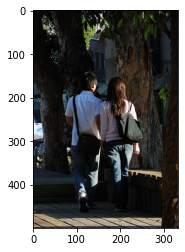

a man in a red shirt and a black shirt and a black shirt and a black shirt and a black and white woman in a red shirt and a black shirt and 




3521201948_9049197f20.jpg


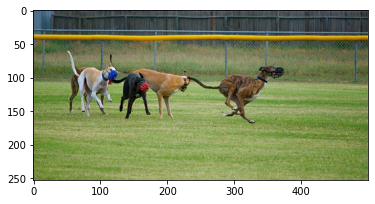

a dog is running through the grass 




2992658871_ac786d37a6.jpg


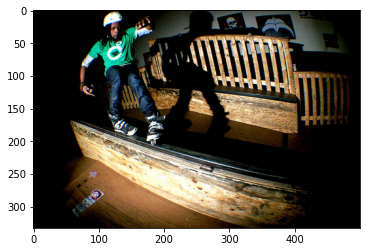

a man in a red shirt is riding a trick on a bench 




3139895886_5a6d495b13.jpg


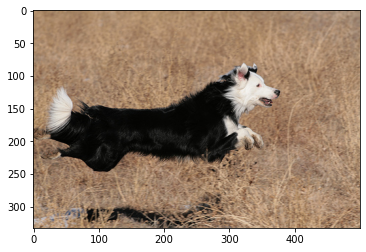

a dog is running through the snow 




483039719_75181b2726.jpg


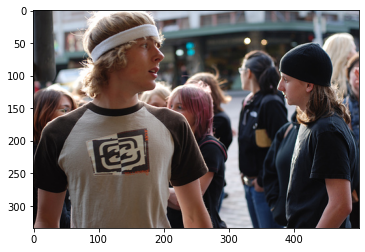

a man in a black shirt and a black shirt and a black shirt and a black shirt and a woman in a white shirt and a black shirt and a black shirt 




3244747165_17028936e0.jpg


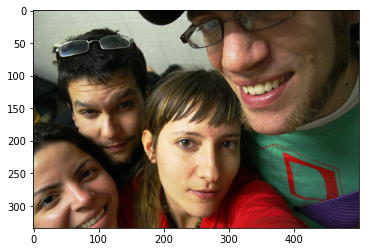

a man in a black shirt and a black shirt and a black shirt and a black shirt and a woman in a white shirt and a black shirt and a black shirt 




1077546505_a4f6c4daa9.jpg


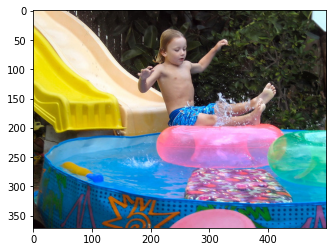

a boy in a red shirt is jumping over a large tree 




561179890_af8e31cb2e.jpg


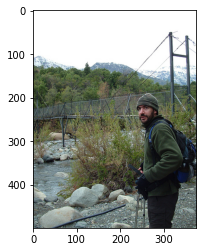

a man in a red shirt is standing on a sidewalk 




488089932_c3a5fa4140.jpg


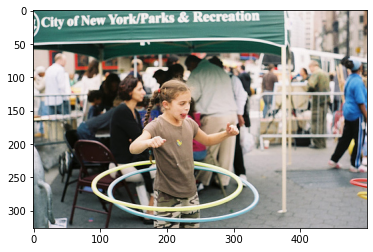

a man in a red shirt and a black shirt is standing on a street 




512550372_438849ce19.jpg


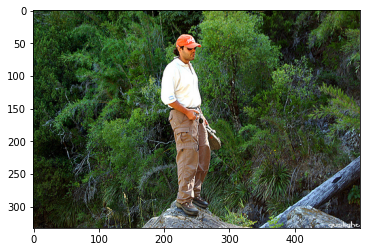

a boy in a red shirt is jumping over a large tree 






In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
from tensorflow.keras.models import load_model

# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
model = load_model('model-ep001-loss3.900-val_loss3.500.h5')

my_directory_url = 'Flickr8k_Dataset'
img_directory = os.listdir(my_directory_url)
random.shuffle(img_directory)
img_directory = img_directory[:10]

for i in img_directory:
    img = mpimg.imread(my_directory_url+'/'+i)
    print(i)
    implot = plt.imshow(img)
    plt.show()
    # load and prepare the photograph
    photo = extract_features_photo(my_directory_url+'/'+i)
    # generate description
    description = generate_desc(model, tokenizer, photo, max_length)
    description = ' '.join(description.split()[1:-1])
    print(description, '\n\n\n\n')